In [1]:
#importaçao dos modulos
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [2]:
dados = load_iris()

In [3]:
dados

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
dadosx = pd.DataFrame(dados.data, columns=[dados.feature_names])

In [5]:
dadosx.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
dadosy = pd.Series(dados.target)

In [16]:
dadosy.head(60)

0     0
1     0
2     0
3     0
4     0
     ..
55    1
56    1
57    1
58    1
59    1
Length: 60, dtype: int32

<AxesSubplot:>

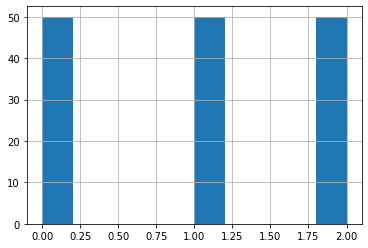

In [21]:
dadosy.hist()

In [24]:
dadosy.value_counts()

0    50
1    50
2    50
dtype: int64

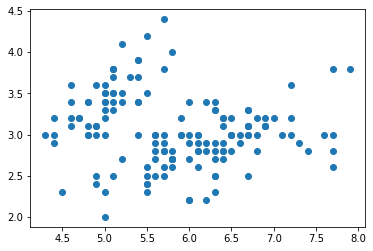

In [30]:
a = dadosx['sepal length (cm)']
b = dadosx['sepal width (cm)']
c = dadosy + 1
plt.scatter(a,b)
#falta definir a cor dos pontos, utilizando para isso os dadosy

In [ ]:
plt.scatter()

In [33]:
#import seaborn as sns
#sns.relplot(data=dadosx, x='sepal length (cm)', y= 'sepal width (cm)', index=[0])
            #hue=dadosy

In [25]:
normaliz= MinMaxScaler(feature_range=(0,1))
dadosxnorm = normaliz.fit_transform(dadosx)
modelo=KNeighborsClassifier()
parametros={'n_neighbors':[3,5,7,9,11],'p':[1,2,3,4], 'metric':['minkowski','chebyshev']}
otimiz=GridSearchCV(estimator=modelo, param_grid=parametros, cv=5)
otimiz.fit(dadosxnorm,dadosy)
print('Best Score:', otimiz.best_score_)
print('Best Parameters:', otimiz.best_params_)

Best Score: 0.9733333333333334
Best Parameters: {'metric': 'minkowski', 'n_neighbors': 5, 'p': 3}
